<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-PotterSR/blob/main/Oct20-21/DESI_Excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scienceplots

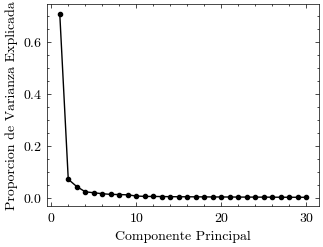

In [139]:
import numpy as np
from astropy.io import fits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'no-latex'])

# Cargar los espectros de un archivo
archivo_espectros = fits.open("/content/drive/MyDrive/Data/coadd-sv3-dark-25956.fits")
flujo_b = archivo_espectros["B_FLUX"].data  # Suponiendo que deseas realizar PCA en la banda "B"
wavelength = archivo_espectros["B_WAVELENGTH"].data

# Realizar PCA en los espectros
n_componentes = 30  # Número de componentes principales a retener (puedes cambiar esto)
pca = PCA(n_components=n_componentes)
componentes_principales = pca.fit_transform(flujo_b)

# Graficar la proporción de varianza explicada
proporcion_varianza_explicada = pca.explained_variance_ratio_
plt.plot(np.arange(1, n_componentes + 1), proporcion_varianza_explicada, 'k', marker = '.')
plt.xlabel('Componente Principal')
plt.ylabel('Proporcion de Varianza Explicada')
plt.show()

In [140]:
fibermap=Table(archivo_espectros["FIBERMAP"].data)
fibermap

TARGETID,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX
int64,int32,float64,float64,float32,float32,float32,int64,uint8,str3,float64,int32,int16,str8,int32,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,str1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32
39627776315097634,0,218.52424978650916,-0.5708880487743447,0.0,0.0,2015.5,262148,1,TGT,0.6786714935367465,1,9010,2186m005,328362,546,PSF,0.038301565,2.1088462,2.6753373,3.0280137,6.1234255,8.722145,638.51776,192.55594,83.18806,2.96911,0.6273142,1.6395667,2.079997,2.3541927,1.6395754,2.0800092,2.3542047,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,4,262148,0,0,0,0,0,0,218.52424978650916,-0.5708880487743447,7,5968.394,4,4,-0.0035714286,0.0043915506,-0.0028571428,0.005732115,218.5242362522236,0.03474935,-0.570876468972911,0.07156216,0.789
39627770271109740,0,218.44895797439506,-0.719380644742242,0.0,0.0,2015.5,262148,1,TGT,0.8617445200003712,1,9010,2183m007,326921,4716,PSF,0.038511276,1.8675007,2.2263274,1.7445359,4.1686535,5.4304776,1080.8403,643.4569,74.2835,3.3928757,0.7213921,1.4534671,1.7327403,1.3577642,1.4534671,1.7327403,1.3577642,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,4,262148,0,0,0,0,0,0,218.44895797439506,-0.719380644742242,7,6376.1396,5,5,-0.005,0.0077551827,-0.003,0.0067717903,218.4489392177955,0.07953809,-0.7193684246118572,0.08681177,0.789
39627770271109663,0,218.44489778234856,-0.6503627954768026,0.0,0.0,2015.5,262148,1,TGT,0.6862554823098777,1,9010,2183m007,326921,4639,PSF,0.03767091,0.9389951,1.5217457,2.1123633,4.973551,7.649223,1709.9951,657.91705,129.35243,3.182526,0.6444316,0.73003054,1.1830955,1.6422768,0.7300333,1.1831069,1.6423012,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,4,262148,0,0,0,0,0,0,218.44489778234856,-0.6503627954768026,2,1641.9678,1,1,-0.007,0.007,0.003,0.003,218.4448717597359,0.0,-0.650374501195604,0.0,0.789
39627770271107659,0,218.3599421015996,-0.7847012179461395,0.0,0.0,2015.5,1179714,1,TGT,0.7512892596631447,1,9010,2183m007,326921,2635,REX,0.044287086,0.340597,0.39200372,0.51483154,3.026456,5.6512446,640.03625,299.1042,63.7238,3.2205527,0.67119694,0.2123443,0.24439368,0.32097036,0.21235447,0.24442847,0.32104084,0,1.0,0.33836335,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103100,9,1179714,0,0,0,0,0,0,218.3599421015996,-0.7847012179461395,3,2093.9639,1,1,0.001,0.001,-0.004,0.004,218.3599457913388,0.0,-0.7846852779973815,3.996803e-13,0.77981704
39627770271108753,0,218.4061716317348,-0.6684951821184881,0.0,0.0,2015.5,1179714,1,TGT,0.6726693674048274,1,9010,2183m007,326921,3729,REX,0.038801994,1.3429354,1.497762,2.075864,14.70572,18.051325,1067.2585,443.66803,67.02692,2.9109225,0.6239691,0.90932155,1.0141568,1.4055984,0.90932155,1.0141568,1.4055984,0,1.0,0.26051852,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103100,9,1179714,0,0,0,0,0,0,218.4061716317348,-0.6684951821184881,3,2093.9639,1,1,-0.003,0.003,-0.005,0.005,218.40616018510846,0.0,-0.6684750931668034,3.996803e-13,0.7834136
39627764227118638,0,218.2220149915

In [141]:
tids=fibermap["TARGETID"]
archivo_espectros.close()

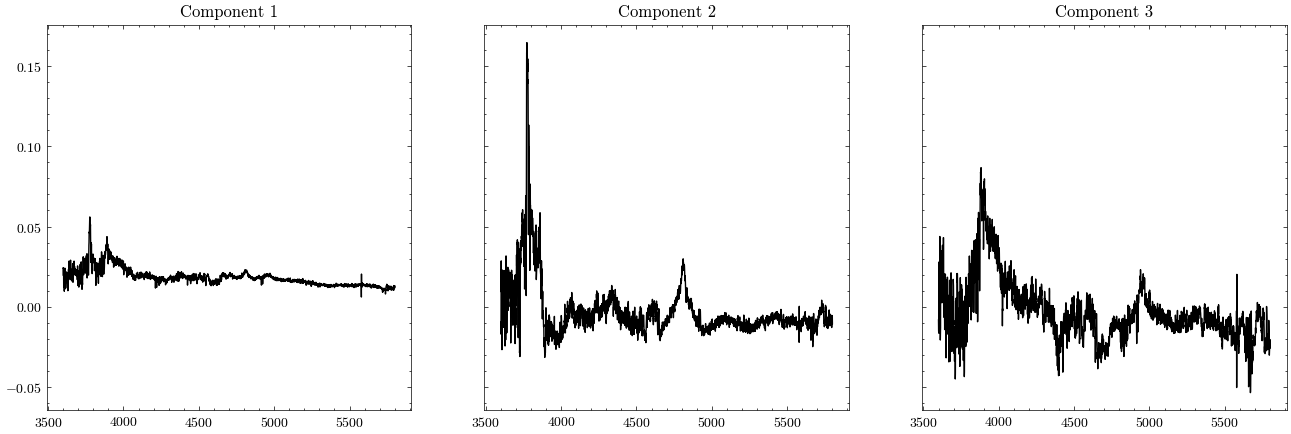

In [142]:
components = pca.components_
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5), sharey=True)

for i in range(3):
  axes[i].plot(wavelength, components[i], 'k')
  axes[i].set_title(f'Component {i+1}')

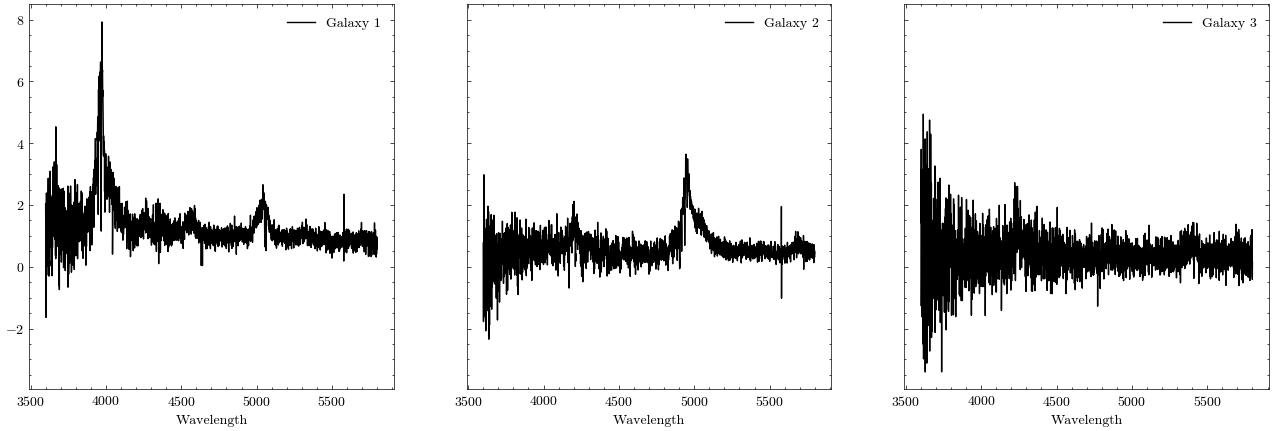

In [143]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5), sharey=True)

for i in range(3):
  axes[i].plot(wavelength, flujo_b[i], 'k', label = f'Galaxy {i+1}')
  axes[i].set_xlabel('Wavelength')
  axes[i].legend()
  #axes[i].set_title('')
  #.ylabel('Flux')
  #plt.show()
#plt.legend()

In [144]:
specmean = flujo_b.mean(0)

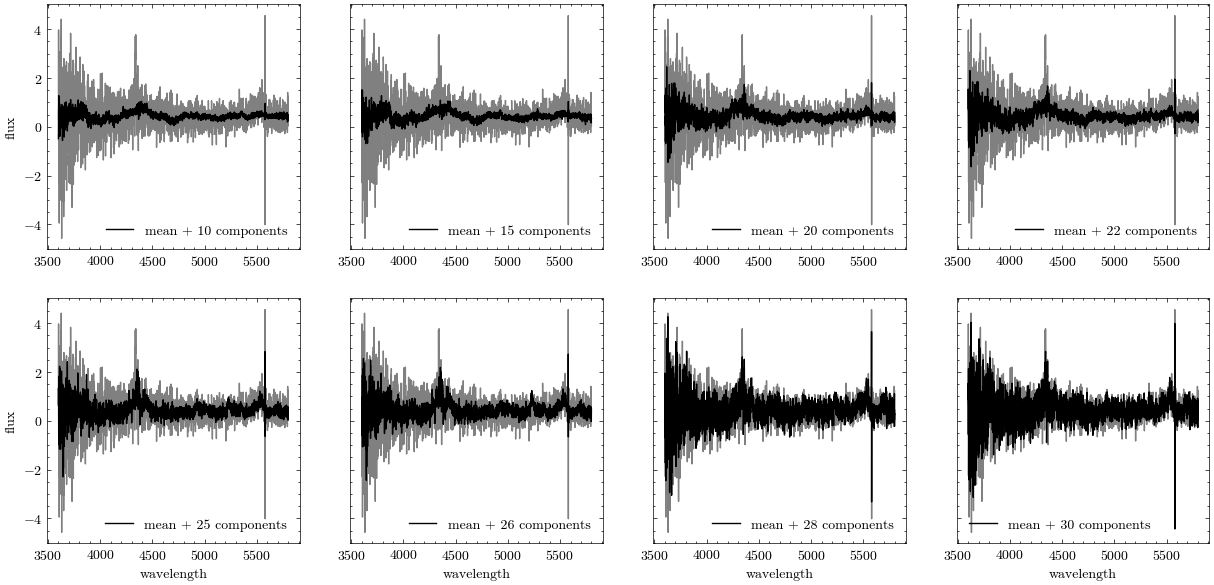

In [145]:
import enum
spec = flujo_b[3]

coeff = np.dot(components, spec-specmean)

fig, ax = plt.subplots(ncols=4, nrows=2, figsize = (15, 7), sharey=True)
j = 0
for i,n in enumerate([10, 15, 20, 22, 25, 26, 28,30]):

  if i > 3:
    ax[j+1][i-4].plot(wavelength, spec, '-', color = 'gray')
    ax[j+1][i-4].plot(wavelength, specmean + np.dot(coeff[:n], components[:n]), 'k',
                      label = f'mean + {n} components')
    ax[j+1][i-4].legend()
    ax[j+1][i-4].set_xlabel('wavelength')
  else:
    ax[j][i].plot(wavelength, spec, '-', color = 'gray')
    ax[j][i].plot(wavelength, specmean + np.dot(coeff[:n], components[:n]), 'k',
                      label = f'mean + {n} components')
    ax[j][i].legend()

fig.axes[0].set_ylabel('flux')
fig.axes[4].set_ylabel('flux')
plt.show()

In [146]:
coeff.shape

(30,)

Exercise: Use the PCA analysis to find the principal components that corresponds for the spectra we have. Do it first for the spectra in only one file, then combine the data from different files and make the PCA again.

In [147]:
import os

files = os.listdir('/content/drive/MyDrive/Data')
desi_files = []

for name in files:
  if ".fits" in name:
    desi_files.append(name)

archivo_espectros = fits.open("/content/drive/MyDrive/Data/coadd-sv3-dark-25956.fits")
flujo_b = archivo_espectros["B_FLUX"].data  # Suponiendo que deseas realizar PCA en la banda "B"
wavelength = archivo_espectros["B_WAVELENGTH"].data
archivo_espectros.close()


In [148]:
#Combinamos todos los flujos en un solo array
flujos_b = np.vstack([fits.open('/content/drive/MyDrive/Data/'+archivo)["B_FLUX"].data for archivo in desi_files[:-1]])


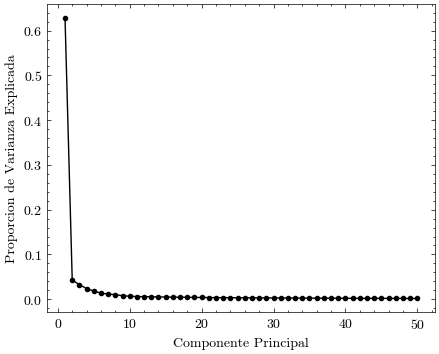

In [149]:
#Realizamos los mismo que arriba, hacemos un PCA
n_componentes = 50
pca = PCA(n_components=n_componentes)
componentes_principales = pca.fit_transform(flujos_b)
proporcion_varianza_explicada = pca.explained_variance_ratio_

fig = plt.figure(figsize=(5,4))
plt.plot(np.arange(1, n_componentes + 1), proporcion_varianza_explicada, 'k', marker = '.')
plt.xlabel('Componente Principal')
plt.ylabel('Proporcion de Varianza Explicada')
plt.show()

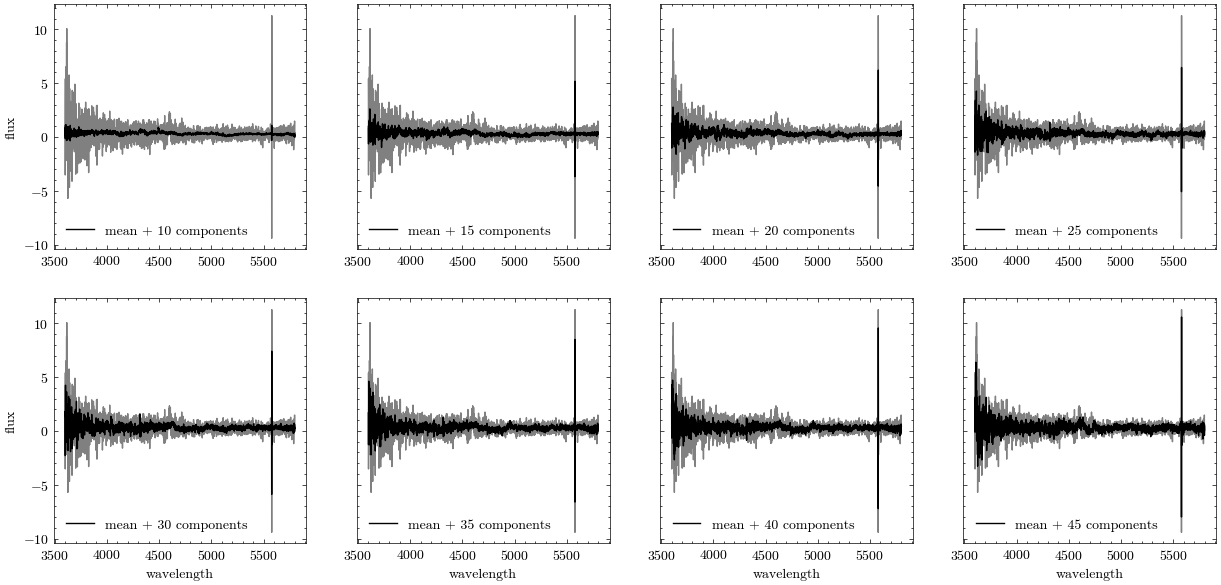

In [150]:
components = pca.components_

spec_mean = flujos_b.mean(0)
spec = flujos_b[100]

coeff = np.dot(components, spec-spec_mean)

fig, ax = plt.subplots(ncols=4, nrows=2, figsize = (15, 7), sharey=True)
j = 0
for i,n in enumerate([10, 15, 20, 25, 30, 35, 40, 45]):

  if i > 3:
    ax[j+1][i-4].plot(wavelength, spec, '-', color = 'gray')
    ax[j+1][i-4].plot(wavelength, spec_mean + np.dot(coeff[:n], components[:n]), 'k',
                      label = f'mean + {n} components')
    ax[j+1][i-4].legend()
    ax[j+1][i-4].set_xlabel('wavelength')
  else:
    ax[j][i].plot(wavelength, spec, '-', color = 'gray')
    ax[j][i].plot(wavelength, spec_mean + np.dot(coeff[:n], components[:n]), 'k',
                      label = f'mean + {n} components')
    ax[j][i].legend()

fig.axes[0].set_ylabel('flux')
fig.axes[4].set_ylabel('flux')
plt.show()

In [151]:
from astropy.io import fits
from astropy.table import Table
zcat=Table.read("/content/drive/MyDrive/Data/zall-pix-edr-vac.fits",hdu=1)
#Display the redshift catalog.
zcat

TARGETID,SURVEY,PROGRAM,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,CMX_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SV1_SCND_TARGET,SV2_DESI_TARGET,SV2_BGS_TARGET,SV2_MWS_TARGET,SV2_SCND_TARGET,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,SV_NSPEC,SV_PRIMARY,ZCAT_NSPEC,ZCAT_PRIMARY,MIN_MJD,MEAN_MJD,MAX_MJD,FIRSTNIGHT,LASTNIGHT
int64,bytes7,bytes6,int32,int32,float64,float64,int64,float64,float64[10],int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,bytes8,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,bool,int64,bool,float64,float64,float64,int32,int32
39628473198708395,cmx,other,2154,2154,-0.0019956912923479522,4.1311493573349107e-48,1570,8.999999999999996e+99,0.0 .. 0.0,0,STAR,CV,3,1.942668892225729e+84,512,23.661967677367254,29.84758879289675,0.0,0.0,2020.9597,9007199254742016,1,TGT,0.3743222091683128,7,9010,--,494512,1707,DEV,0.056008916,0.8742358,4.4879527,14.53286,40.183647,23.470558,846.09424,161.24467,27.071745,-1.0,-1.0,0.30432662,1.5622828,5.0589743,0.30432662,1.5622828,5.0589743,0,4.0,1.4857041,-0.47312373,0.34610084,0,--,0.0,0.0,0.0,0.0,S,3200,1,9007199254742016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.661967677367254,29.84758879289675,0,0.0,0,0,0.0,0.0,0.0,0.0,23.6619676773673,0.0,29.8475887928968,0.0,0.7702122,334.5758,0.23833227,63.154266,251.84634,1200.8414,489.7509,6.6365247,1.7938427,29931.836,67.48044,5253.2964,0.107736714,5998.398,33749.49,20.86845,95.85028,4.4280867e-05,226.88919,8.178434e-06,0.0,9751.99,5.995135e-05,48.05161,102.743744,30266.412,294.60797,5316.4507,251.95409,16951.23,34239.24,75.55658,200.38788,0,False,1,True,59200.06640136,59200.095110124996,59200.12381137,20201216,20201216
39628473198709499,cmx,other,2154,2154,0.797663336968385,6.764807540963103e-05,0,8562.711500316858,173.84545793773444 .. 3.5471443000513863,7928,GALAXY,--,10,1111.0357974395156,0,23.711764237454403,29.843726508418328,0.0,0.0,2020.9597,9007199254742016,1,TGT,0.6556303597015493,7,9010,--,494512,2811,DEV,0.055015083,0.37260255,2.0997107,11.454535,42

In [152]:
zcat=zcat['TARGETID','SURVEY','SPECTYPE','Z']
zcat

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
39628473198708395,cmx,STAR,-0.0019956912923479522
39628473198709499,cmx,GALAXY,0.797663336968385
39628473198710139,cmx,GALAXY,1.33150513847107
39628473198710603,cmx,GALAXY,0.804205874112604
39628473198711006,cmx,STAR,-6.607473910190775e-05
39628473198711342,cmx,STAR,-0.0019956912923479522
39628473198711925,cmx,GALAXY,0.39072440164450306
39628473202901028,cmx,GALAXY,0.6657999257489294
39628473202901626,cmx,GALAXY,0.32842015807005115


In [153]:
mask=zcat["SURVEY"]=='sv3'
zcat=zcat[mask]
zcat

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
616088497761027054,sv3,GALAXY,0.8047145429076951
616088497765221242,sv3,STAR,-0.0019956912923479522
616088497765221281,sv3,GALAXY,0.5507557262875663
616088497765221450,sv3,GALAXY,0.07358486749516376
616088497765221501,sv3,GALAXY,0.719444701817346
616088497769415698,sv3,GALAXY,0.039215908005138314
616088497773610181,sv3,GALAXY,0.2864062436603106
616088497819747217,sv3,GALAXY,0.4960341488452893
616088497819747383,sv3,GALAXY,1.0968576187793935


In [156]:
mask=np.in1d(zcat["TARGETID"],tids)
zcat=zcat[mask]
zcat

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
39627764218727224,sv3,QSO,2.1370347911252843
39627764222919195,sv3,QSO,2.5460148518383536
39627764222919677,sv3,QSO,2.5116209374418137
39627764222921791,sv3,QSO,2.1421198094951523
39627764222924517,sv3,QSO,2.2851727866116023
39627764227118438,sv3,QSO,3.630129643577127
39627764227118638,sv3,QSO,2.540430344832981
39627770258523079,sv3,QSO,1.5479191017583473
39627770258526411,sv3,QSO,2.470417839489763


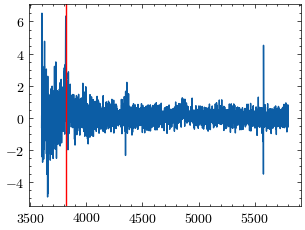

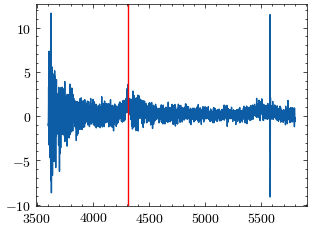

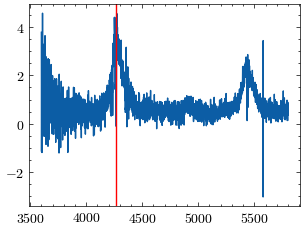

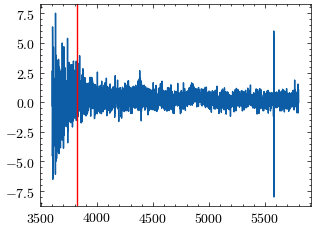

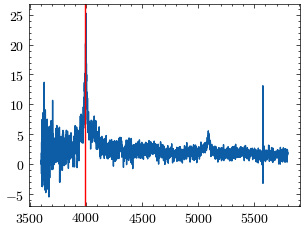

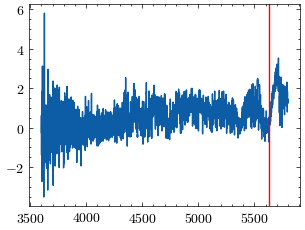

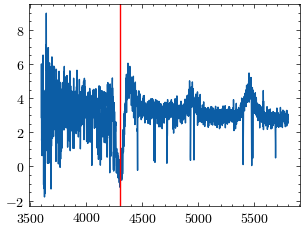

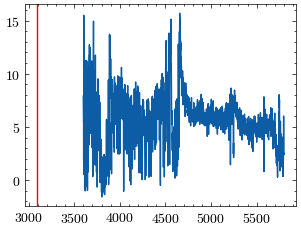

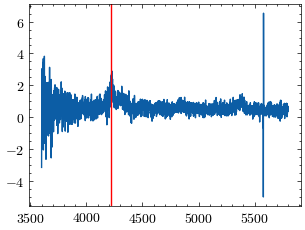

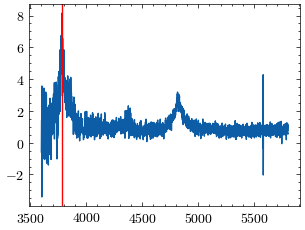

In [158]:
lya=1216

for i,tid in enumerate(zcat["TARGETID"][:10]):
  z=zcat["Z"][i]
  indx=np.where(tids==tid)[0][0]
  plt.plot(wavelength,flujo_b[indx])
  plt.axvline(1216*(1+z),color='r')
  plt.show()